# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [238]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


# Import your own code
import inauguralproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

In [239]:

from inauguralproject import HouseholdSpecializationModelClass as HSMC

alpha = [0.25,0.5,0.75]
sigma = [0.5,1,1.5]
function = HSMC() 

def print_table(alpha, sigma):
    
    table = ''
    
    table += f'{"":3s}'
    for j, HF in enumerate(sigma):
       table += f'{j:8d}' 
    table += '\n'
    
    for i, a in enumerate(alpha):
        if i > 0:
            table += '\n'
        table += f'{i:3d} '
        for j, s in enumerate(sigma):
            function.par.alpha = a
            function.par.sigma = s
            HM = function.solve_discrete().HM
            HF = function.solve_discrete().HF
            table += f'{HF/HM:8.4f}'
    
    # d. print
    print(table)

print_table(alpha,sigma)

/Users/clarajensen/projects-2023-mc/inauguralproject/inauguralproject.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  TM = LM+HM
/Users/clarajensen/projects-2023-mc/inauguralproject/inauguralproject.py:64: RuntimeWarning: invalid value encountered in reciprocal
  TM = LM+HM
/Users/clarajensen/projects-2023-mc/inauguralproject/inauguralproject.py:68: RuntimeWarning: invalid value encountered in reciprocal
  return utility - disutility


          0       1       2
  0   0.5455  0.3077  0.2143
  1   1.0000  1.0000  1.0000
  2   1.8333  3.2500  4.6667


# Question 2

Explain your code and procedure

In [240]:
xvalues=np.log(model.par.wF_vec)
print(xvalues)

[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


In [241]:
for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve_discrete()
        
        yvalues = np.log(results.HF/results.HM)

        print(yvalues)


0.22314355131420976
0.0
0.0
-0.11778303565638351
-0.2231435513142097


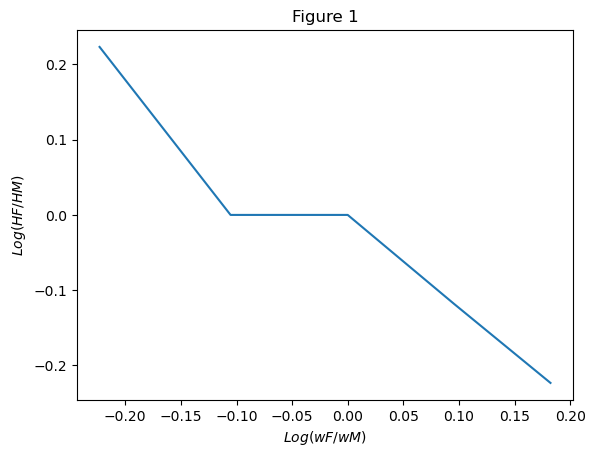

In [242]:
# b. plot
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(xvalues,[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097])

ax.set_title('Figure 1')
ax.set_xlabel('$Log(wF/wM)$')
ax.set_ylabel('$Log(HF/HM)$');

# Question 3

Explain your code and procedure

In [247]:
model.solve()

model.par.alpha=0.5
model.par.sigma=1

# Append to ratios with each iteration
ratios = []
for i in range(5):
        model.par.wF = model.par.wF_vec[i]
        results = model.solve()
        
        ratio = np.log(results.HF/results.HM) 
        print(ratio)
        ratios.append(ratio)

log_WF_WM=np.log(model.par.wF_vec)
print(ratios)
print(log_WF_WM)

AttributeError: 'NoneType' object has no attribute 'HF'

In [248]:
logratioHc=[]
logratiowc=[]

# b. loop over every wF, solve the model and adds the result to the empty lists 
for i in model.par.wF_vec:
    # i. set the wF = i
    model.par.wF = i
    # ii. use 'solve' from the class to find the results and store en 'resultsc'
    resultsc =model.solve()
    # iii. append the log(HF/HM) til the list 'logratioHc' 
    logratioHc.append(np.log(resultsc.HF/resultsc.HM))
    # iv. append the log(wF/wM) til the list 'logratiowc' 
    logratiowc.append(np.log(i/model.par.wM))

# c. construct a dataframe to contain H and w log ratios for every wF
plot_dfc = pd.DataFrame({"wf": model.par.wF_vec, "H ratio": np.round(logratioHc, 4), "w ratio": np.round(logratiowc, 4)})
plot_dfc

# d. illustrate the relationship between 'logratioH' and 'logratiow' for given wF using the 'plot_illustration' function
model.plot_illustration(plot_dfc)

AttributeError: 'NoneType' object has no attribute 'HF'

ADD CONCISE CONLUSION.